In [1]:
import random
for i in range(5):
 
    # Any number can be used in place of '0'.
    random.seed(2)
 
    # Generated random number will be between 1 to 1000.
    print(random.randint(1, 1000))

979
979
979
979
979


In [2]:
import random
 
random.seed(3)
 
# print a random number between 1 and 1000.
print(random.randint(1, 1000))
 
# if you want to get the same random number again then,
random.seed(2)
print(random.randint(1, 1000))
 
# If seed function is not used
 
# Gives totally unpredictable responses.
print(random.randint(1, 1000))

244
979
884


In [3]:
import numpy as np
a= np.random.rand(4,10000,1)
a.shape

(4, 10000, 1)

In [4]:
 np.random.rand(4,10000).shape

(4, 10000)

In [5]:
np.random.rand(2,2,2)

array([[[0.91232355, 0.74646564],
        [0.0057501 , 0.28010424]],

       [[0.07931099, 0.46959635],
        [0.62724367, 0.61462522]]])

In [6]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [7]:
def create_data(samples, batch):
    fre1, fre2, offset1, offset2= np.random.rand(4,samples,1)
    time=np.linspace(0, 1, batch)
    series= 0.5* np.sin((time-offset1)* (fre1*10 +10))
    series += 0.2* np.sin((time-offset2)* (fre1*20 +20))
    series += 0.1 +(np.random.rand(samples, batch) - 0.5)
    
    return series[:,:, np.newaxis]

In [8]:
np.random.seed(42)
batch=50
data = create_data(10000, batch+1)
train_x, train_y= data[:7000,:batch], data[:7000, -1]
valid_x, valid_y=data[7000:9000,:batch], data[7000:9000, -1]
test_x, test_y=data[9000:,:batch], data[9000:, -1]

In [9]:
data.shape

(10000, 51, 1)

In [10]:
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape

((7000, 50, 1), (7000, 1), (2000, 50, 1), (2000, 1), (1000, 50, 1), (1000, 1))

In [11]:
def curves(data, y=None, y_pred =None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(data, ".-")
    if y is not None:
        plt.plot(batch+1, y, "xb")
    if y_pred is not None:
        plt.plot(batch+1, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize= 15)
    if y_label:
        plt.ylabel(y_label, fontsize= 15)

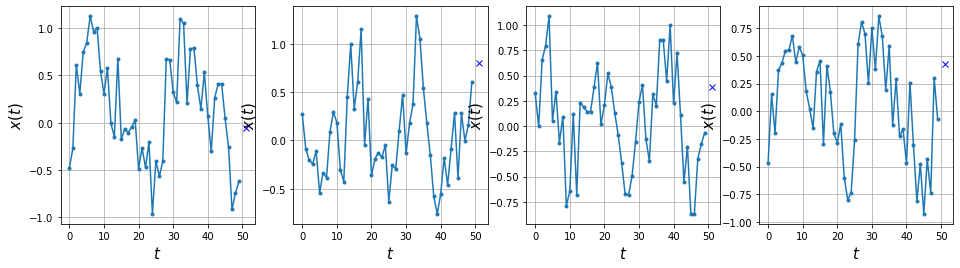

In [12]:
plt.figure(figsize=(16,4))
for i in range(1,5):
    plt.subplot(1,4,i)
    curves(valid_x[i,:,0], valid_y[i,0])
    

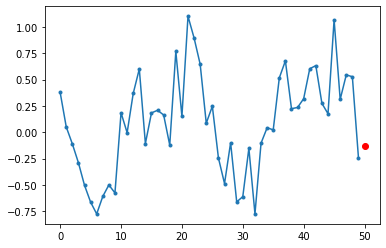

In [13]:
plt.plot(train_x[0,:,0], ".-")
plt.plot(50,train_y[0,:], "ro")

In [14]:
valid_x[1,:,0].shape

(50,)

In [15]:
valid_x[2,:,0].shape

(50,)

In [16]:
valid_y[1,0]

-0.05555416654564127

# Linear - Model

In [17]:
linear_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(50,1)),
    keras.layers.Dense(1)
])

linear_model.compile(loss ="mse", optimizer="Adam")
history = linear_model.fit(train_x, train_y, validation_data=[valid_x, valid_y], epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.4877 - val_loss: 0.3241
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.2468 - val_loss: 0.2130
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1750 - val_loss: 0.1611
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1422 - val_loss: 0.1376
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1275 - val_loss: 0.1281
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1212 - val_loss: 0.1237
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1185 - val_loss: 0.1220
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1177 - val_loss: 0.1210
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1171 - val_loss: 0.1211
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1170 - val_loss: 0.1213

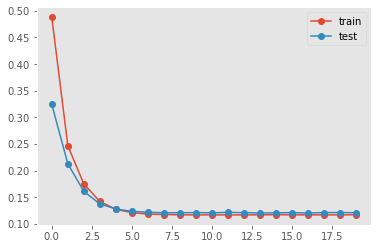

In [18]:
plt.style.use("ggplot")
plt.plot(history.history["loss"],marker="o", label="train")
plt.plot(history.history["val_loss"],marker="o", label="test")
plt.grid()
plt.legend()

In [19]:
pre_y =linear_model.predict(valid_x)

63/63 [==============================] - 0s 726us/step


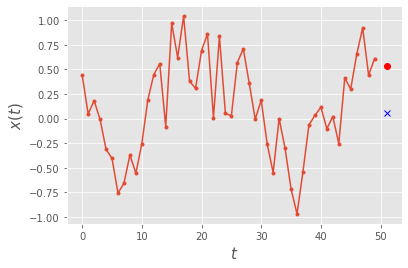

In [20]:
curves(valid_x[0,:,0], valid_y[0,0], pre_y[0,0] )

# Simple_RNN model

In [21]:
simple_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(1,input_shape=(50,1))
])
opt= tf.keras.optimizers.Adam(learning_rate=0.01)
simple_rnn.compile(loss="mse", optimizer=opt)
simple_rnn_his=simple_rnn.fit(train_x, train_y, validation_data=[valid_x, valid_y], epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.3219 - val_loss: 0.1936
Epoch 2/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1521 - val_loss: 0.1467
Epoch 3/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1412 - val_loss: 0.1463
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1413 - val_loss: 0.1463
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1415 - val_loss: 0.1468
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1414 - val_loss: 0.1462
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1414 - val_loss: 0.1468
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1417 - val_loss: 0.1469
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1415 - val_loss: 0.1468
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1414 - val_loss: 0.1477

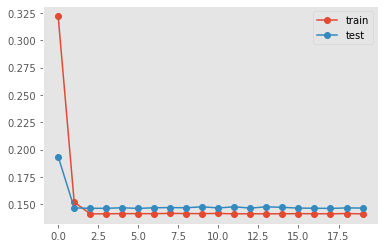

In [22]:
plt.plot(simple_rnn_his.history["loss"],marker="o", label="train")
plt.plot(simple_rnn_his.history["val_loss"],marker="o", label="test")
plt.grid()
plt.legend()

In [23]:
pre_y =simple_rnn.predict(valid_x)

63/63 [==============================] - 0s 2ms/step


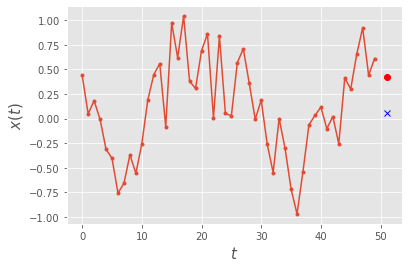

In [24]:
curves(valid_x[0,:,0], valid_y[0,0], pre_y[0,0] )

In [25]:
simple_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# Deep_NN


In [26]:
deep_nn= keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1, return_sequences=True)
])
deep_nn.compile(loss="mse", optimizer=opt)
deep_nn_his=deep_nn.fit(train_x, train_y, validation_data=[valid_x, valid_y], epochs=20)

Epoch 1/20
219/219 [==============================] - 7s 23ms/step - loss: 0.2312 - val_loss: 0.2377
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.2201 - val_loss: 0.2382
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.2203 - val_loss: 0.2384
Epoch 4/20
219/219 [==============================] - 4s 21ms/step - loss: 0.2200 - val_loss: 0.2380
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.2199 - val_loss: 0.2378
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.2198 - val_loss: 0.2384
Epoch 7/20
219/219 [==============================] - 5s 21ms/step - loss: 0.2197 - val_loss: 0.2379
Epoch 8/20
219/219 [==============================] - 4s 20ms/step - loss: 0.2201 - val_loss: 0.2378
Epoch 9/20
219/219 [==============================] - 4s 20ms/step - loss: 0.2197 - val_loss: 0.2382
Epoch 10/20
219/219 [==============================] - 5s 21ms/step - loss: 0.2197 - val_lo

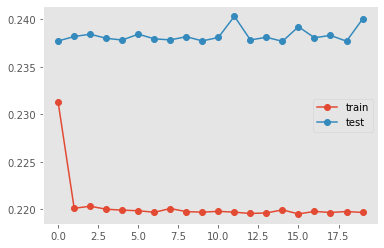

In [27]:
plt.plot(deep_nn_his.history["loss"],marker="o", label="train")
plt.plot(deep_nn_his.history["val_loss"],marker="o", label="test")
plt.grid()
plt.legend()

In [28]:
pre_y =deep_nn.predict(valid_x)

63/63 [==============================] - 1s 6ms/step


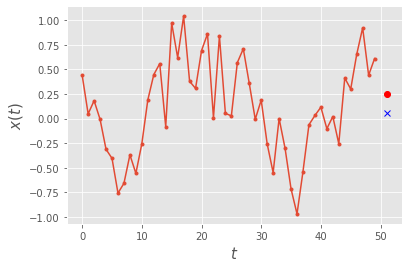

In [29]:
curves(valid_x[0,:,0], valid_y[0,0], pre_y[0,0] )

In [36]:
rnn= keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
rnn.compile(loss="mse", optimizer=opt)
rnn_history=rnn.fit(train_x, train_y, validation_data=[valid_x, valid_y], epochs=20)

Epoch 1/20
219/219 [==============================] - 5s 17ms/step - loss: 0.2040 - val_loss: 0.1665
Epoch 2/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1536 - val_loss: 0.1441
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1476 - val_loss: 0.1567
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1533 - val_loss: 0.1476
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1492 - val_loss: 0.1461
Epoch 6/20
219/219 [==============================] - 4s 16ms/step - loss: 0.1487 - val_loss: 0.1708
Epoch 7/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1504 - val_loss: 0.1588
Epoch 8/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1491 - val_loss: 0.1458
Epoch 9/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1463 - val_loss: 0.1533
Epoch 10/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1484 - val_lo

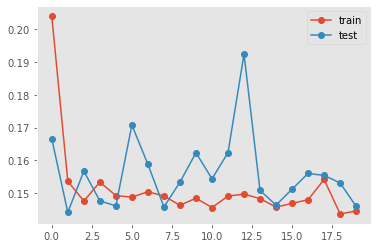

In [37]:
plt.plot(rnn_history.history["loss"],marker="o", label="train")
plt.plot(rnn_history.history["val_loss"],marker="o", label="test")
plt.grid()
plt.legend()

63/63 [==============================] - 0s 4ms/step


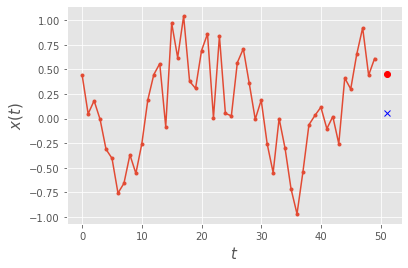

In [38]:
pre_y =rnn.predict(valid_x)
curves(valid_x[0,:,0], valid_y[0,0], pre_y[0,0] )